# Leveraging Customer Data for Predictive Sales Insights in E-Commerce

Before we start off with predicting Sales data we need to understand why is it important to analyse Customer's purchase data? 

Analyzing online purchasing customer data is essential for predicting future sales. Customer data provides valuable insights into how customers interact with an online store, what products they are interested in, and their browsing and purchasing patterns. By analyzing historical customer data, businesses can identify trends and patterns in purchasing behavior. These trends can be used to predict future sales and adjust inventory levels, marketing efforts, and promotions accordingly. This data will also help in customer segmentation which allows the business owners to target specific groups, tailor their marketing strategies and product offerings to meet customer needs and preferences, leading to increased sales.

Importing Necessary Libraries

In [261]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.graph_objs as go
import warnings
warnings.filterwarnings(action = 'ignore')

Let us use pandas Library to load the dataset

In [262]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [263]:
### Dataset Description:

1. Administrative, Informational, Product related columns are the different pages on the E-commerce website.
2. Administrative duration, Informational duration, Product related duration corresponds to the time spent on the respectives pages.
3. Bounce rate is a metric that measures the percentage of visitors who leave a website or online store after viewing only a single page, without        interacting further with the site.
4. Exit rate indicates the percentage of users who exit the website after viewing that particular page, relative to the total number of visitors who viewed that page.
5. Special Day - This feature indicates the closeness of the date of the visit to a special day, such as a holiday or festival
6. Month: The "Month" feature represents the month in which the visit or transaction took place.
7. OperatingSystems: This feature records the operating system used by the visitor to access the e-commerce website.
8. Browser: The "Browser" feature indicates the web browser used by the visitor to access the website.
9. Region: This feature indicates the geographic region or location of the visitor.
10. TrafficType: The "TrafficType" feature represents the source or channel through which the visitor arrived at the e-commerce website.
11. VisitorType: This feature categorizes visitors based on their visit history. It typically has categorical values such as "New Visitor," "Returning Visitor," or "Other."
12. Weekend: The "Weekend" feature is a binary indicator (0 or 1) that shows whether the visit occurred on a weekend (Saturday or Sunday) or not.
13. Revenue: The "Revenue" feature is the target variable in many e-commerce datasets. It is a binary indicator (0 or 1) that shows whether a transaction resulted in revenue (1) or not (0)

In [264]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [265]:
data.columns  # to see what are the attributes that make up this dataframe.

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [266]:
data.isnull().sum()  # To see if there are any missing data in our dataframe.

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [267]:
unique_products = data['ProductRelated'].unique() # To check how many varieties of products are present.
unique_products

array([  1,   2,  10,  19,   0,   3,  16,   7,   6,  23,  13,  20,   8,
         5,  32,   4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,
        42,  27,  90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,
        31,  24,  50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,
        71,  63,  87,  40,  33,  54,  64,  75,  39, 111,  81,  61,  47,
        44,  88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,
        58,  57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,
        89,  65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110,
       132, 115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127,
       125, 116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204,
       142, 206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108,
       119,  70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156,
       136, 180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178,
       184, 705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 30

In [268]:
len(unique_products)

311

### Feature Engineering : 
It is difficult to work with Categorical data. Most of the Machine Learning Algorithms use numerical data. Hence, it is necessary to convert categorical data to numeric data. 

In this dataframe columns like - Visitor Type, Month, Weekend, Revenue are categorical type. These features have to be converted to numeric data type.

In [269]:
data.duplicated().value_counts() # Let us first drop the duplicated rows.

False    12205
True       125
dtype: int64

In [270]:
data.drop_duplicates(inplace = True)

In [271]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [279]:
data['VisitorType'] = data['VisitorType'].map({'Returning_Visitor': 1, 'New_Visitor' : 2, 'Other':3 })  # Converting to numeric type using mapping function

In [272]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [273]:
data['Month'] = data['Month'].map({'Feb': 2, 'Mar' : 3, 'May':5, 'Oct' : 10, 'June' : 6, 'Jul' : 7, 'Aug' :8, 'Nov' : 11, 'Sep': 9, 'Dec': 12})

In [274]:
from sklearn.preprocessing import LabelEncoder
weekend_encoder = LabelEncoder()
data['Weekend'] = weekend_encoder.fit_transform(data['Weekend'])

In [275]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_true = label_encoder.fit_transform(data['Revenue'])

In [276]:
data['Revenue'] = labels_true

In [280]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


Now that we have converted all the categorical features to numerical one, we can start applying Machine Learning algorithms.

# 1. KMeans Method:

The K-means clustering method is used in unsupervised machine learning to partition a dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean (centroid). K-means is commonly used for clustering and data segmentation tasks, where the goal is to group similar data points together based on their feature similarity. 

Let us take 2 features Product Related Duration and Bounce rates and apply clustering.

In [281]:
x = data.iloc[:, [5, 6]].values

In [282]:
x.shape

(12205, 2)

In [283]:
x 

array([[0.0000000e+00, 2.0000000e-01],
       [6.4000000e+01, 0.0000000e+00],
       [0.0000000e+00, 2.0000000e-01],
       ...,
       [1.8425000e+02, 8.3333333e-02],
       [3.4600000e+02, 0.0000000e+00],
       [2.1250000e+01, 0.0000000e+00]])

The K-elbow method is a technique used in machine learning to find the optimal number of clusters (K) in a K-means clustering algorithm by evaluating the within-cluster sum of squares (WCSS) for different values of K.

In [286]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    Km = KMeans(n_clusters = i,     # number of clusters (K) to the current value of i
               init = 'k-means++',  # initialization method for centroids
               max_iter = 300,      # The maximum number of iterations for each run of K-means
               n_init = 10,         # The number of times the K-means algorithm will be run with different centroid seeds
               random_state = 0,    # A random seed to ensure reproducibility
               algorithm = 'full',  # This specifies the K-means algorithm to use
               tol = 0.001)         # The tolerance for convergence
    Km.fit(x)
    labels = Km.labels_
    wcss.append(Km.inertia_)

In [287]:
Km.labels_

array([0, 0, 0, ..., 0, 0, 0])

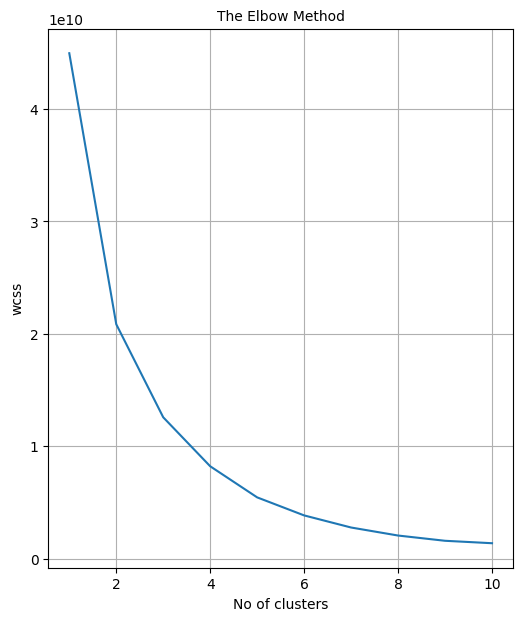

In [288]:
fig, ax = plt.subplots(1,1, figsize = (6,7))
plt.plot(range(1,11), wcss)
plt.grid()
plt.title('The Elbow Method', fontsize = 10)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In the above graph there is a huge reduction at 2. That is called the elbow point. That will be the value of K. Once the number of clusters are determined, we can apply KMeans clustering and plot the clusters.

In [289]:
Km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = Km.fit_predict(x)
y_means

array([0, 0, 0, ..., 0, 0, 0])

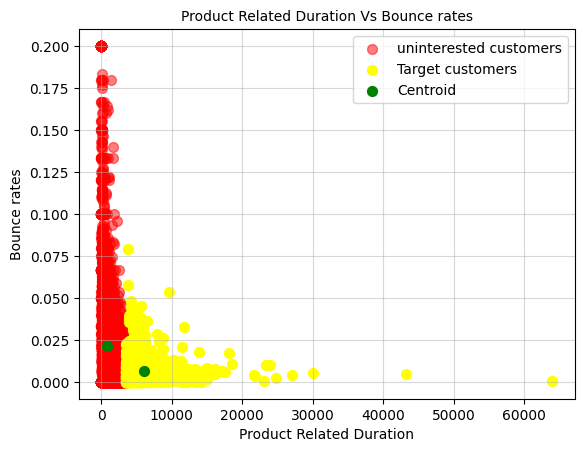

In [290]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 50, color = 'red', alpha = 0.5, label = 'uninterested customers')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 50, color = 'yellow', alpha = 1.0, label = 'Target customers')
plt.scatter(Km.cluster_centers_[:,0], Km.cluster_centers_[:,1], s = 50, color = 'green', label = 'Centroid')


plt.grid(alpha = 0.5)
plt.title('Product Related Duration Vs Bounce rates', fontsize = 10)
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce rates')
plt.legend()
plt.show()

By this K-Means clustering plot, we can conclude that customers who spent more time on a product related website will not leave the website just after viewing one page, as they have low bounce rates.

To evaluate our clustering results, we can plot confusion matrix. 

In [291]:
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(score)

0.08248493804362389


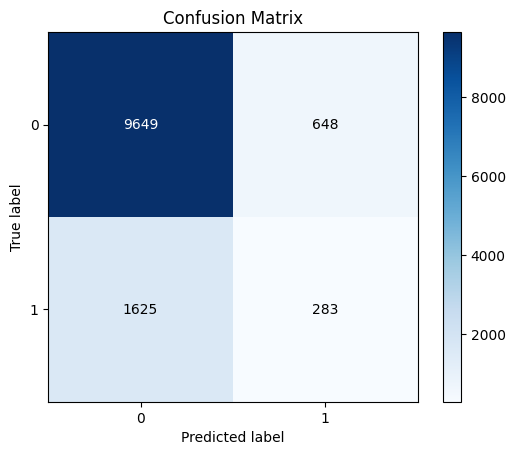

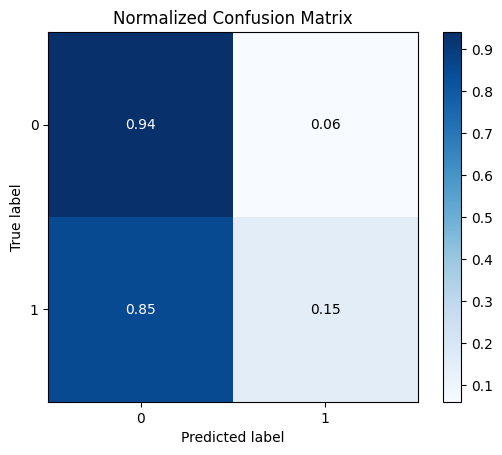

In [292]:
import scikitplot as skplt

graph1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
graph2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)



From the confusion matrix, we can see that out of 10,297 failed incomes, 9649 are grouped into uninterested customers or 94%. However, out of 1908 successful incomes, only 283 are grouped as target customers or 15%. Also, the adjusted index score is not very high.

So we can conclude that, we have falsely classified many successful revenues as uninterested customers. That is even if the bounce rates are high and product related duration is low, there are customers who purchase the product and genearte the revenue.

# 2. Random Forest Regressor:

In [235]:
X=data.drop('Revenue',axis=1)  # Drop the target feature to train the model
y=data['Revenue']

In [294]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [295]:
y_train.value_counts()

0    8218
1    1546
Name: Revenue, dtype: int64

In [297]:
y_test.value_counts()

0    2079
1     362
Name: Revenue, dtype: int64

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9045473166734944
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2079
           1       0.73      0.56      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441



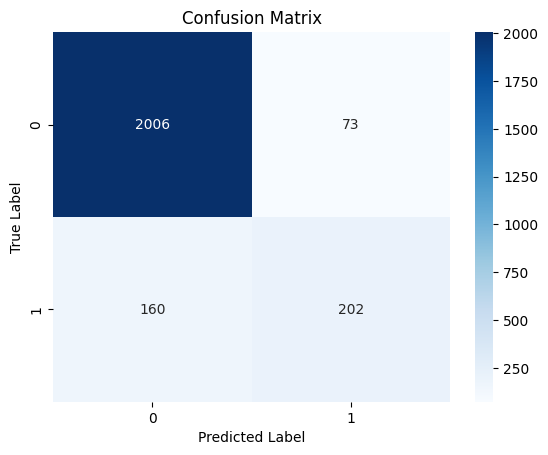

In [299]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


We can increase the accuracy by using SMOTE. The Synthetic Minority Over-sampling Technique (SMOTE) is used to handle class imbalance in the target variable y. SMOTE is a popular technique used in machine learning to balance imbalanced datasets by generating synthetic samples for the minority class.

In [310]:
from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [312]:
y_train.value_counts()

1    8238
0    8237
Name: Revenue, dtype: int64

In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9325078902646273
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2060
           1       0.92      0.95      0.93      2059

    accuracy                           0.93      4119
   macro avg       0.93      0.93      0.93      4119
weighted avg       0.93      0.93      0.93      4119



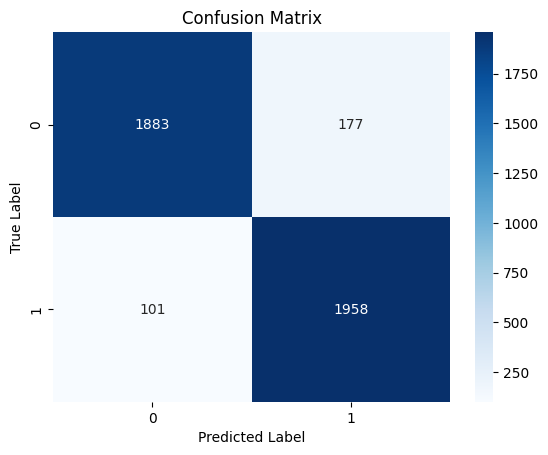

In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [317]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# Testing the Random forest model

In [322]:
# Define user input as a dictionary
user_input = {'Administrative' : 6,
              'Informational' : 14,
              'ProductRelated': 82,
              'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Create a DataFrame from the user input dictionary
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

user_df['VisitorType'] = user_df['VisitorType'].map({'Returning_Visitor': 1, 'New_Visitor' : 2, 'Other':3 })

# Make a prediction for the user input
prediction = rf.predict(user_df)
print(prediction)

[0]


It is evident that for the given set of inputs, the customer is not likely to make a purchase online.

Similarly, we can give the model different sets of input and predict whether a customer visiting an online shopping website will make a purchase or not.